<a href="https://colab.research.google.com/github/swastika1122/LOAN-PREDICTION-MODEL/blob/main/LOAN_PREDICTION_MODEL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##1.Problem Statement

In [29]:
#Problem Statement:
#The objective of this project is to predict whether a bank loan application will be approved or rejected based on the applicant’s personal, financial, and credit-related details.

#This is a binary classification problem, where:

#1 indicates that the loan is approved

#0 indicates that the loan is rejected

##2.Importing Important Libraries

In [30]:
# Data handling
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


##3.Load Dataset

In [31]:
df = pd.read_csv("train.csv")
df.head()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


##4.Dataset Understanding

In [32]:
df.shape        # rows, columns
df.info()       # data types & null values
df.describe()   # numerical summary


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


##5. Target Variable Analysis (EDA)

In [33]:
df['Loan_Status'].value_counts()


,count
Loan_Status,
Y,422
N,192


##6. Univariate Analysis (EDA)

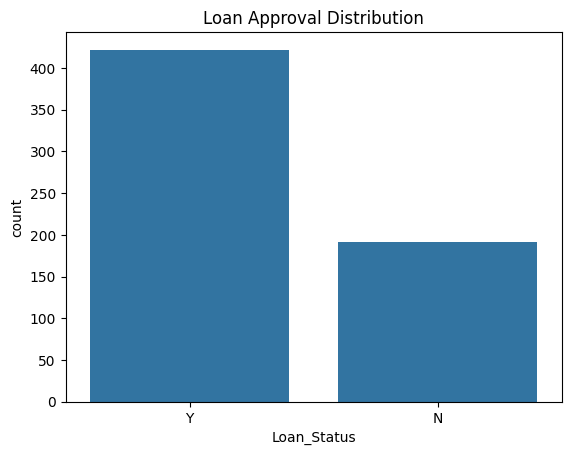

In [34]:
#Loan Status Distribution
sns.countplot(x='Loan_Status', data=df)
plt.title("Loan Approval Distribution")
plt.show()


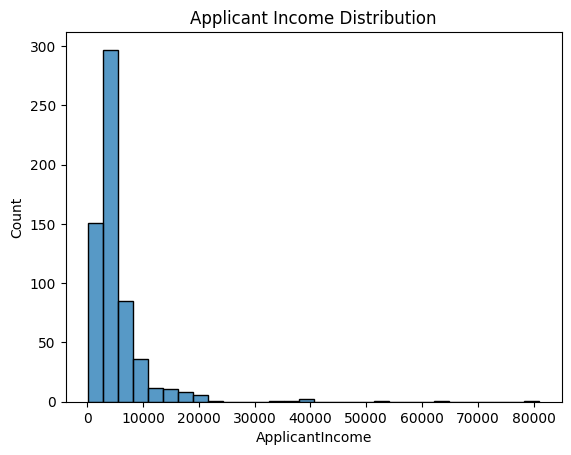

In [35]:
#Applicant Income Distribution
sns.histplot(df['ApplicantIncome'], bins=30)
plt.title("Applicant Income Distribution")
plt.show()

##7. Bivariate Analysis (EDA)

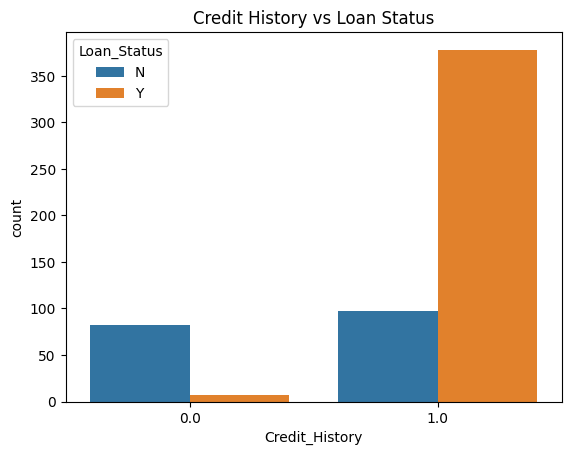

In [36]:
#Credit History vs Loan Status
sns.countplot(x='Credit_History', hue='Loan_Status', data=df)
plt.title("Credit History vs Loan Status")
plt.show()

In [37]:
#Applicants with Credit_History = 1 have a much higher chance of loan approval.

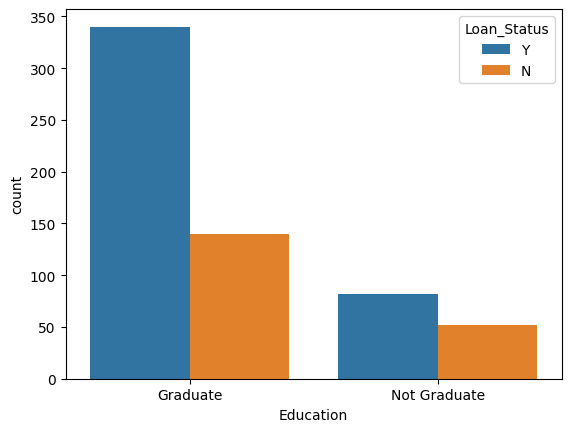

In [38]:
#Education vs Loan Status
sns.countplot(x='Education', hue='Loan_Status', data=df)
plt.show()

In [39]:
#Graduates have higher approval rates.

##8. Missing Value Treatment (Feature Engineering)

In [40]:
# Categorical columns → mode
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
df['Married'].fillna(df['Married'].mode()[0], inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace=True)




/tmp/ipython-input-397833270.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
/tmp/ipython-input-397833270.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)',

In [41]:
# Numerical columns → median / mode
df['LoanAmount'].fillna(df['LoanAmount'].median(), inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0], inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)

/tmp/ipython-input-1018933956.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['LoanAmount'].fillna(df['LoanAmount'].median(), inplace=True)
/tmp/ipython-input-1018933956.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplac

In [42]:
#LoanAmount has outliers → median is robust.

##9. Feature Engineering

In [43]:
#Total Income Feature
df['Total_Income'] = df['ApplicantIncome'] + df['CoapplicantIncome']

In [44]:
#Log Transformation (Reduce Skewness)
#Improves model stability.
df['ApplicantIncome_log'] = np.log(df['ApplicantIncome'])
df['LoanAmount_log'] = np.log(df['LoanAmount'])
df['Total_Income_log'] = np.log(df['Total_Income'])

In [45]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income,ApplicantIncome_log,LoanAmount_log,Total_Income_log
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y,5849.0,8.674026,4.852030,8.674026
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,6091.0,8.430109,4.852030,8.714568
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,3000.0,8.006368,4.189655,8.006368
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4941.0,7.856707,4.787492,8.505323
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,6000.0,8.699515,4.948760,8.699515


##10. Encode Categorical Variables

In [46]:
#ML models work only with numeric data.
le = LabelEncoder()

for col in df.select_dtypes(include='object'):
    df[col] = le.fit_transform(df[col])

In [47]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income,ApplicantIncome_log,LoanAmount_log,Total_Income_log
0,0,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,1,5849.0,8.674026,4.852030,8.674026
1,1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0,6091.0,8.430109,4.852030,8.714568
2,2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1,3000.0,8.006368,4.189655,8.006368
3,3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1,4941.0,7.856707,4.787492,8.505323
4,4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1,6000.0,8.699515,4.948760,8.699515


##11. Feature & Target Separation

In [48]:
X = df.drop(['Loan_ID', 'Loan_Status'], axis=1)
y = df['Loan_Status']
df.head()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income,ApplicantIncome_log,LoanAmount_log,Total_Income_log
0,0,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,1,5849.0,8.674026,4.852030,8.674026
1,1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0,6091.0,8.430109,4.852030,8.714568
2,2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1,3000.0,8.006368,4.189655,8.006368
3,3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1,4941.0,7.856707,4.787492,8.505323
4,4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1,6000.0,8.699515,4.948760,8.699515


##12. Train-Test Split

In [49]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


##13. Model Training

In [50]:
#Logistic Regression
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_scaled, y_train)

y_pred_lr = lr.predict(X_test_scaled)


Feature Scaling:
Logistic Regression is sensitive to feature scales.
Therefore, StandardScaler was applied to normalize numerical features and ensure faster convergence and stable training.

In [51]:
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [52]:
#Random Forest
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

##14. Model Evaluation

In [53]:
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))


Logistic Regression Accuracy: 0.7804878048780488
Random Forest Accuracy: 0.7723577235772358


##15. Confusion Matrix

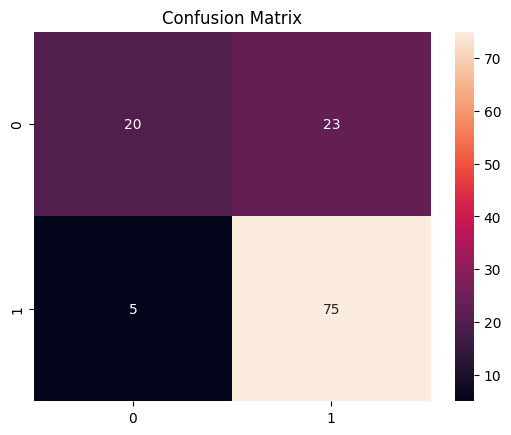

In [54]:
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.show()


##16. Feature Importance

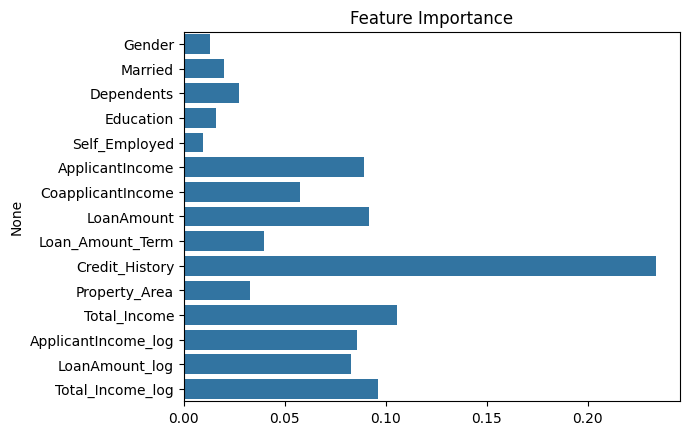

In [55]:
importances = rf.feature_importances_
features = X.columns

sns.barplot(x=importances, y=features)
plt.title("Feature Importance")
plt.show()


In [56]:
#Most Important Feature: Credit_History

##17. Final Conclusion (Markdown Cell)


In [58]:
#Credit History plays a crucial role in loan approval.
#Feature engineering improved model performance.
#Random Forest outperformed Logistic Regression.
#The model can effectively predict loan approval status.